# Importing libs

In [94]:
# Install requirements
!pip3 install transformers
!pip3 install torchvision
!pip3 install keras

     |████████████████████████████████| 1.3 MB 638 kB/s eta 0:00:01


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random
import re
import string

import scipy.spatial
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams


from tqdm import tqdm
from pprint import pprint

import sys
import os
import glob
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'





In [4]:
PATH = '../input/good-reads-quotes'

In [151]:
# Here all files 
for name in glob.glob(PATH + '/*'):
    print(name)

../input/good-reads-quotes/quotes_of_relationships.csv
../input/good-reads-quotes/quotes_of_love.csv
../input/good-reads-quotes/quotes_of_humor.csv
../input/good-reads-quotes/quotes_of_death.csv
../input/good-reads-quotes/quotes_of_science.csv
../input/good-reads-quotes/quotes_of_time.csv
../input/good-reads-quotes/quotes_of_god.csv
../input/good-reads-quotes/quotes_of_success.csv
../input/good-reads-quotes/quotes_of_religion.csv
../input/good-reads-quotes/quotes_of_inspiration.csv
../input/good-reads-quotes/quotes_of_wisdom.csv
../input/good-reads-quotes/quotes_of_life.csv
../input/good-reads-quotes/quotes_of_knowledge.csv
../input/good-reads-quotes/quotes_of_inspirational.csv
../input/good-reads-quotes/quotes_of_romance.csv
../input/good-reads-quotes/quotes_of_education.csv
../input/good-reads-quotes/quotes_of_quotes.csv
../input/good-reads-quotes/quotes_of_hope.csv
../input/good-reads-quotes/quotes_of_faith.csv
../input/good-reads-quotes/quotes_of_happiness.csv
../input/good-reads-q

As we sow we have a lot of csv file, which is contains a quotes for exact label.



We want to make just `N-class` like sentiment, and will updata each class with some quotes which is relate to this class.

* Class `love` -> love + poetry + romance + relationships
* Class `motivation` -> life + inspirational + hope + success

* Class `wisdom` -> truth + faith + wisdom + spirituality

And make a multi-class classification model for this project

In [152]:
love_quotes = ['love' , 'poetry' , 'romance' , 'relationships']
motivation_quotes = ['hope', 'life' , 'inspirational' , 'success']
wisdom_quotes = ['wisdom', 'truth' , 'faith' , 'spirituality']


# Customize data

### Make a love Class

In [153]:
love_list = []
for q in love_quotes:
    path = PATH + "/quotes_of_" + q + ".csv"
    name = "quotes_of_" + q
    df = pd.read_csv(path)
    li = df[name].values
    for row in li:
        love_list.append(row)
    

love_list[0]

"“I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.”\n― Marilyn Monroe"

In [154]:
len(love_list)

11998

In [155]:
# There is no none values
None in love_list

False

### Make a motivation class

In [156]:
motive_list = []
for q in motivation_quotes:
    path = PATH + "/quotes_of_" + q + ".csv"
    name = "quotes_of_" + q
    df = pd.read_csv(path)
    li = df[name].values
    for row in li:
        motive_list.append(row)
    

motive_list[0]

'“Yesterday is history, tomorrow is a mystery, today is a gift of God, which is why we call it the present.”\n― Bill Keane'

In [157]:
len(motive_list)

11998

In [158]:
# There is no none values
None in motive_list

False

### Make a wisdom class

In [159]:
wisdom_list = []
for q in wisdom_quotes:
    path = PATH + "/quotes_of_" + q + ".csv"
    name = "quotes_of_" + q
    df = pd.read_csv(path)
    li = df[name].values
    for row in li:
        wisdom_list.append(row)
    

wisdom_list[0]

'“No one can make you feel inferior without your consent.”\n― Eleanor Roosevelt, This is My Story'

In [160]:
len(wisdom_list)

11994

In [161]:
# There is no none values
None in wisdom_list

False

## Collect quotes and labels

**Make all three classes in one list**

In [162]:
quotes = love_list + motive_list + wisdom_list

In [163]:
len(quotes)

35990

**Makes a labels for each class and collect them in one list**

In [164]:
print(len(love_list) , len(motive_list), len(wisdom_list))

11998 11998 11994


**What about label?**


I can make a lable of each class, by knowing the size of each one and make a list contain all classes.



In [165]:
labels = []
love = ['love' for i in range(len(love_list))]                   ## ading love label
motivation = ['motivation' for i in range(len(motive_list))]     ## ading motivation label
wisdom = ['wisdom' for i in range(len(wisdom_list))]             ## ading motivation label
labels = love + motivation + wisdom
len(labels)

35990

In [166]:
labels[0], labels[len(motive_list)+1], labels[-1]

('love', 'motivation', 'wisdom')

In [167]:
# They have the same length
len(quotes), len(labels)

(35990, 35990)

**Shuffel quotes and labes for modeling**

In [168]:
import random

a = ['a', 'b', 'c']
b = [1, 2, 3]

c = list(zip(a, b))

random.shuffle(c)

a, b = zip(*c)

print(a)
print(b)


('a', 'c', 'b')
(1, 3, 2)


In [169]:
shuffled_data = list(zip(quotes, labels))
random.shuffle(shuffled_data)
quotes, labels = zip(*shuffled_data)


In [170]:
len(quotes), len(labels)

(35990, 35990)

In [171]:
print(quotes[0])
print(labels[0])

“To a particular person, a particular personality, mind, lifestyle, voice, gait, laugh, salary, penis, or vagina, cannot be interesting for a very long time.”
― Mokokoma Mokhonoana, On Friendship: A Satirical Essay
love


## Make a dataframe for exact style

In [172]:
data = pd.DataFrame({'quotes': quotes,
                     'class': labels})
data.head()

,quotes,class
0,"“To a particular person, a particular personal...",love
1,“ The well of your soul will not experience th...,wisdom
2,"“Writing, then, was a substitute for myself: i...",love
3,“Maybe I was in love with the idea of love.”\n...,love
4,“Our kindness may be the most persuasive argum...,wisdom


In [173]:
data.shape

(35990, 2)

# EDA

In [174]:
# Missing Values  -> there is no null values
data.isnull().sum()

quotes    0
class     0
dtype: int64

In [175]:
data['class'].value_counts()

motivation    11998
love          11998
wisdom        11994
Name: class, dtype: int64

In [176]:
data['class'].value_counts(normalize = True)

motivation    0.333370
love          0.333370
wisdom        0.333259
Name: class, dtype: float64

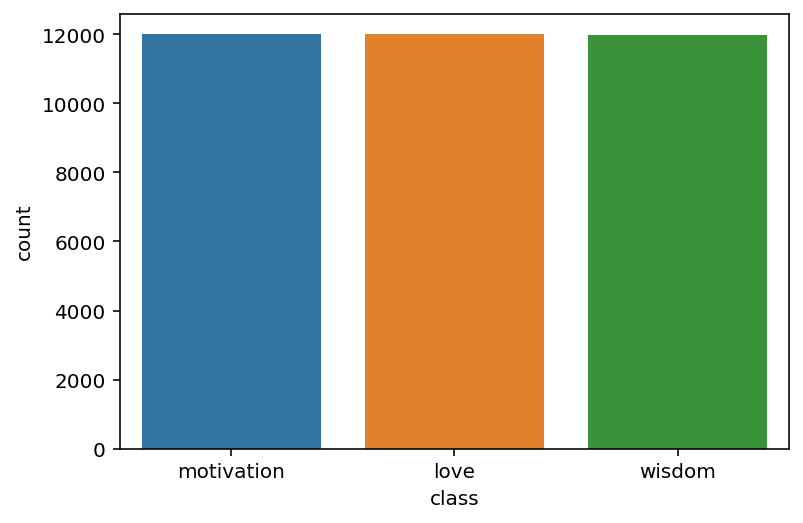

In [177]:
sns.countplot(data= data, x= 'class',
             order = data['class'].value_counts().index);

**Examples of each class**

In [178]:
# Love class
print('--Love class example:--\n', data[data['class'] == 'love']['quotes'].values[0])

# Motivation class
print('--Motivation class example:--\n', data[data['class'] == 'motivation']['quotes'].values[0])

# Wisdom class
print('--Wisdom class example:--\n', data[data['class'] == 'wisdom']['quotes'].values[0])

--Love class example:--
 “To a particular person, a particular personality, mind, lifestyle, voice, gait, laugh, salary, penis, or vagina, cannot be interesting for a very long time.”
― Mokokoma Mokhonoana, On Friendship: A Satirical Essay
--Motivation class example:--
 “We’d met at a carefree time, a moment full of promise, in its place now were the harsh lessons of the real world.”
― Nicholas Sparks, Dear John
--Wisdom class example:--
 “ The well of your soul will not experience the drought until in front of her will appear the moment of eternity to drink from the water of death.”
― Sorin Cerin


# Text Data Preprocessing
We need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. Let's create a function which will perform the following tasks on the text columns:

* Tokenizes
* Make text lowercase
* Removes hyperlinks
* Remove punctuation
* Removes numbers
* Removes useless words "stopwords"
* Stemming/Lemmatization

**First,**

We need to just extract the quotes from the whole quotes which is contain quote and the auther.


In [59]:
text = data['quotes'][0]
print(text)
tmp_1 = re.findall('“([^"]*)”', text)
print(tmp_1)
tmp_2 = re.findall('“([^"]*)”', text)[0]
print(tmp_2)

“Some people would fall in or out of love with you if you lose or gain a few kilos.”
― Mokokoma Mokhonoana
['Some people would fall in or out of love with you if you lose or gain a few kilos.']
Some people would fall in or out of love with you if you lose or gain a few kilos.


In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
stop_words = stopwords.words('english')
stemmer    = nltk.SnowballStemmer("english")

In [62]:
def clean_text(text):
    '''
        Make text lowercase, remove text in square brackets,remove links,remove punctuation
        and remove words containing numbers.
    '''
    # text = re.findall('“([^"]*)”', text)[0] # extract text for quotations
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # text = re.sub('“([\w*\d\w*]*)” ', '', text)
    return text

In [63]:
def preprocess_data(text):
    # text = remove_quotations(text)                                              # extract text for quotations
    text = clean_text(text)                                                     # Clean puntuation, urls, and so on
    text = ' '.join(word for word in text.split() if word not in stop_words)    # Remove stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split())                # Stemm all the words in the sentence
    return text

In [64]:
def remove_quotations(data):
    res = []
    for row in data:
        if re.findall('“([^"]*)”', row):
            res.append(re.findall('“([^"]*)”', row)[0])
    return res

In [65]:
data['clean_text'] = data['quotes'].apply(preprocess_data)
data['clean_text'] = remove_quotations(data['clean_text']) # extract text for quotations
data.head()

,quotes,class,clean_text
0,“Some people would fall in or out of love with...,love,some peopl would fall love lose gain kilos
1,“It is literally true that you can succeed bes...,motivation,it liter true succeed best quickest help other...
2,“Wisdom most of the time takes form of advice....,wisdom,wisdom time take form advic
3,“Whoever is full of wisdom is naturally compas...,wisdom,whoever full wisdom natur compassion fact reco...
4,“It took the city of New York to break them up...,love,it took citi new york break that romant word m...


**Convert sentiment to numerical variable**


In [66]:
data['label'] = data['class'].map({'love': 0,
                                'motivation': 1,
                                'wisdom': 2})
data.head()

,quotes,class,clean_text,label
0,“Some people would fall in or out of love with...,love,some peopl would fall love lose gain kilos,0
1,“It is literally true that you can succeed bes...,motivation,it liter true succeed best quickest help other...,1
2,“Wisdom most of the time takes form of advice....,wisdom,wisdom time take form advic,2
3,“Whoever is full of wisdom is naturally compas...,wisdom,whoever full wisdom natur compassion fact reco...,2
4,“It took the city of New York to break them up...,love,it took citi new york break that romant word m...,0


# Analyzing Text Statistics

We can now do some statistical analysis to explore the data like:

* Text length analysis.
    * length for whole sentence, # of each character in the sentence.
    * count # of word in each sentence.
* word frequency analysis

In [67]:
data['text_n_chars'] = data.clean_text.apply(len) # count all chars in each sentence
data['text_n_words'] = data.clean_text.apply(lambda sent: len(sent.split())) # count number of words in each sentence
data.head()

,quotes,class,clean_text,label,text_n_chars,text_n_words
0,“Some people would fall in or out of love with...,love,some peopl would fall love lose gain kilos,0,42,8
1,“It is literally true that you can succeed bes...,motivation,it liter true succeed best quickest help other...,1,54,9
2,“Wisdom most of the time takes form of advice....,wisdom,wisdom time take form advic,2,28,5
3,“Whoever is full of wisdom is naturally compas...,wisdom,whoever full wisdom natur compassion fact reco...,2,207,29
4,“It took the city of New York to break them up...,love,it took citi new york break that romant word m...,0,75,14


In [68]:
max(data['text_n_words']), min(data['text_n_words'])

(538, 1)

In [69]:
data['text_n_words'].value_counts()

7      2305
8      2272
6      2215
9      2063
10     1950
       ... 
237       1
204       1
172       1
267       1
351       1
Name: text_n_words, Length: 260, dtype: int64

### The distribution of number of words for each class.

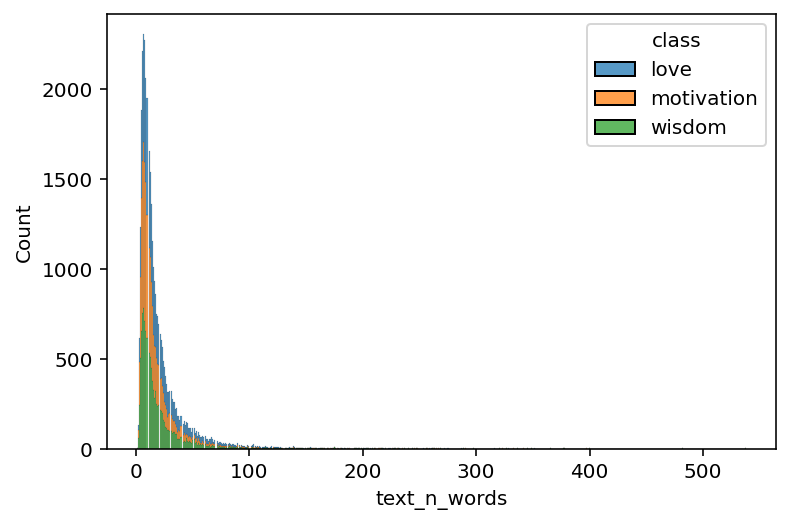

In [70]:
sns.histplot(data= data, x= 'text_n_words', hue= 'class', multiple= 'stack');

We will make each sent > 100 = 100 

In [71]:
data['text_n_words'] = data['text_n_words'].apply(lambda x : 100 if x > 100 else x)

In [72]:
max(data['text_n_words']), min(data['text_n_words'])

(100, 1)

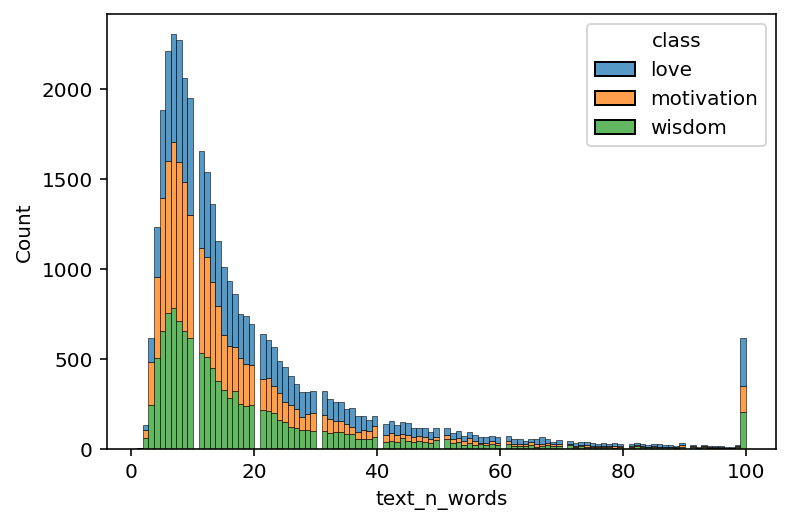

In [73]:
sns.histplot(data= data, x= 'text_n_words', hue= 'class', multiple= 'stack');

## Most frequent words

In [74]:
from collections import Counter

In [75]:
def freq_words(text, c, num):
    '''
        take the whole data, and return data which is have # of words in each sentiment has been passed
    '''
    words = [word for sent in text[text['class'] == c]['clean_text'] for word in sent.split()]
    freq_words = Counter(words)
    freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
    freq_words_df = pd.DataFrame(freq_words_sorted[:num], columns=['word', 'counts'])
    return freq_words_df

In [76]:
def plot_freq(data, st):
    '''
        take the data, and st refeere to kind of sentiment
    '''
    plt.figure(figsize=(12, 6))
    sns.barplot(data= data , x= 'counts', y= 'word')
    plt.title(f'Top 20 words in {st} sentiment')
    plt.show();

### Frequent words for each love class

In [77]:
love_words = freq_words(data, 'love', 20)
love_words.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,love,like,one,want,know,i,life,time,never,would,make,thing,go,feel,think,heart,could,look,peopl,way
counts,6077,2414,2263,1876,1786,1495,1405,1390,1354,1342,1268,1230,1179,1152,1113,1102,1068,1060,1059,1033


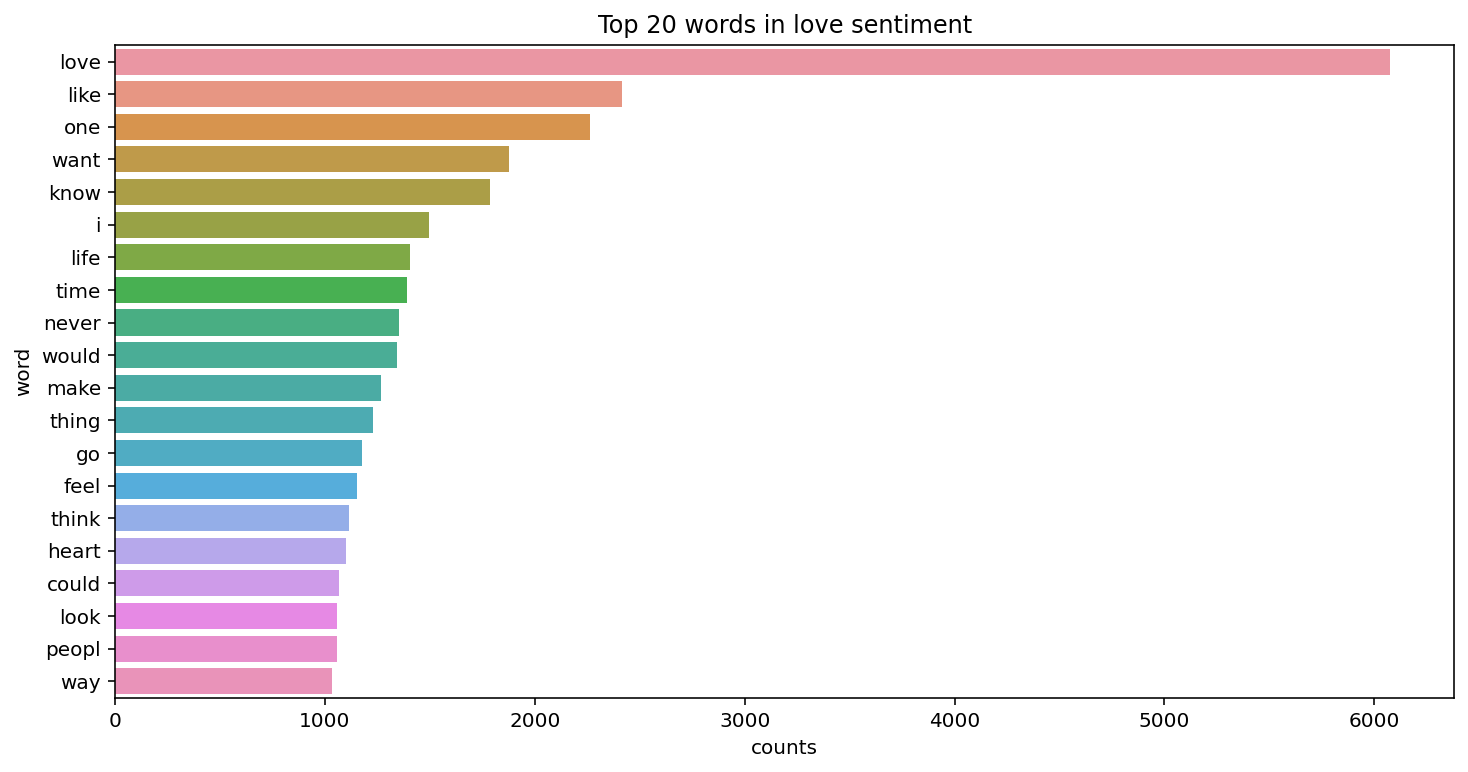

In [78]:
plot_freq(love_words, 'love')

### Frequent words for each motivation class

In [79]:
motivation_words = freq_words(data, 'motivation', 20)
motivation_words.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,life,one,hope,thing,love,make,live,peopl,success,like,know,never,time,world,it,want,us,go,the,dont
counts,3012,1808,1757,1546,1520,1366,1364,1355,1326,1198,1189,1145,1100,1084,1076,1076,1071,1067,943,942


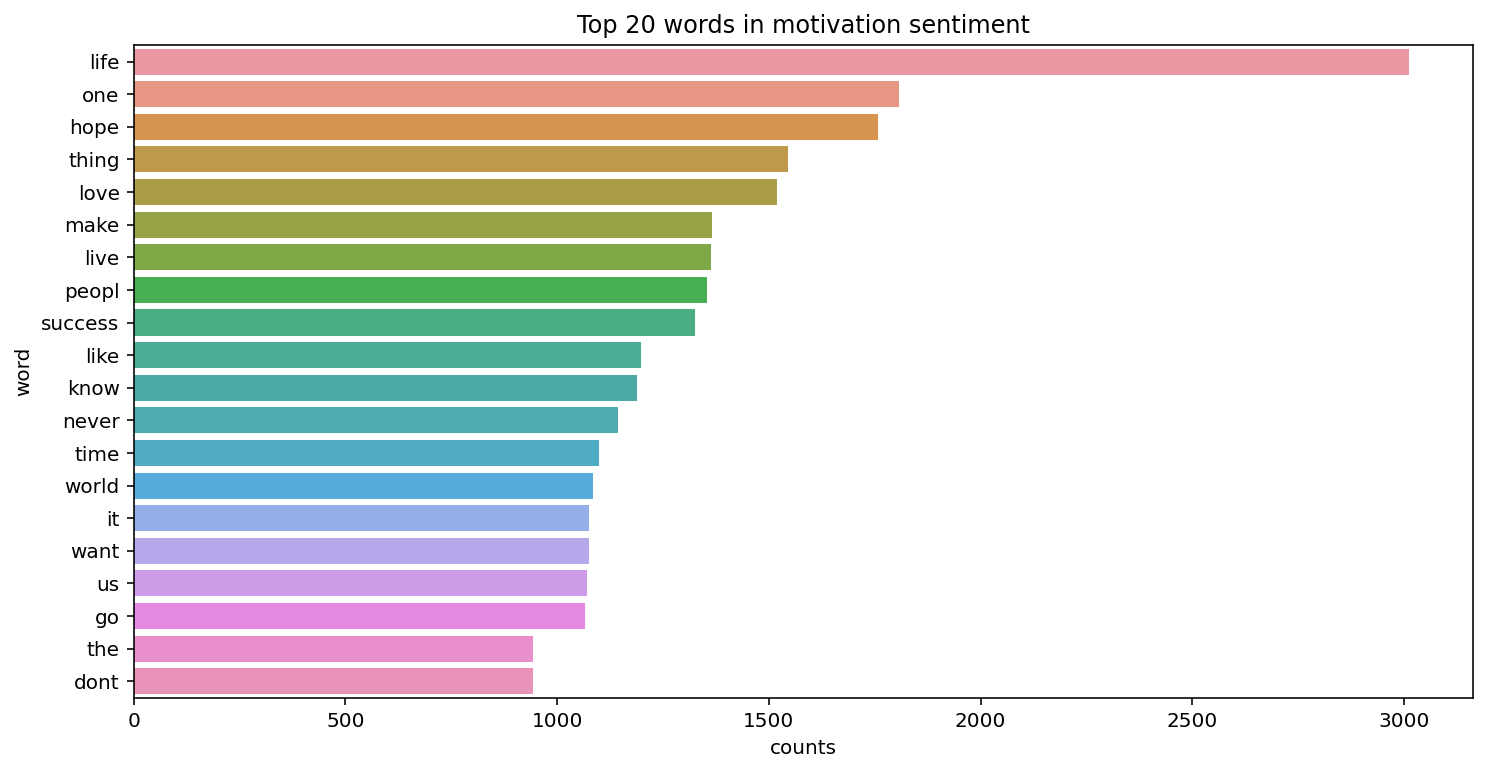

In [80]:
plot_freq(motivation_words, 'motivation')

### Frequent words for each wisdom class

In [81]:
wisdom_words = freq_words(data, 'wisdom', 20)
wisdom_words.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,god,one,truth,life,love,faith,thing,us,know,peopl,the,like,world,live,make,it,believ,never,way,see
counts,2368,2184,2158,1957,1833,1650,1474,1462,1444,1279,1222,1132,1115,1088,1072,996,965,946,919,880


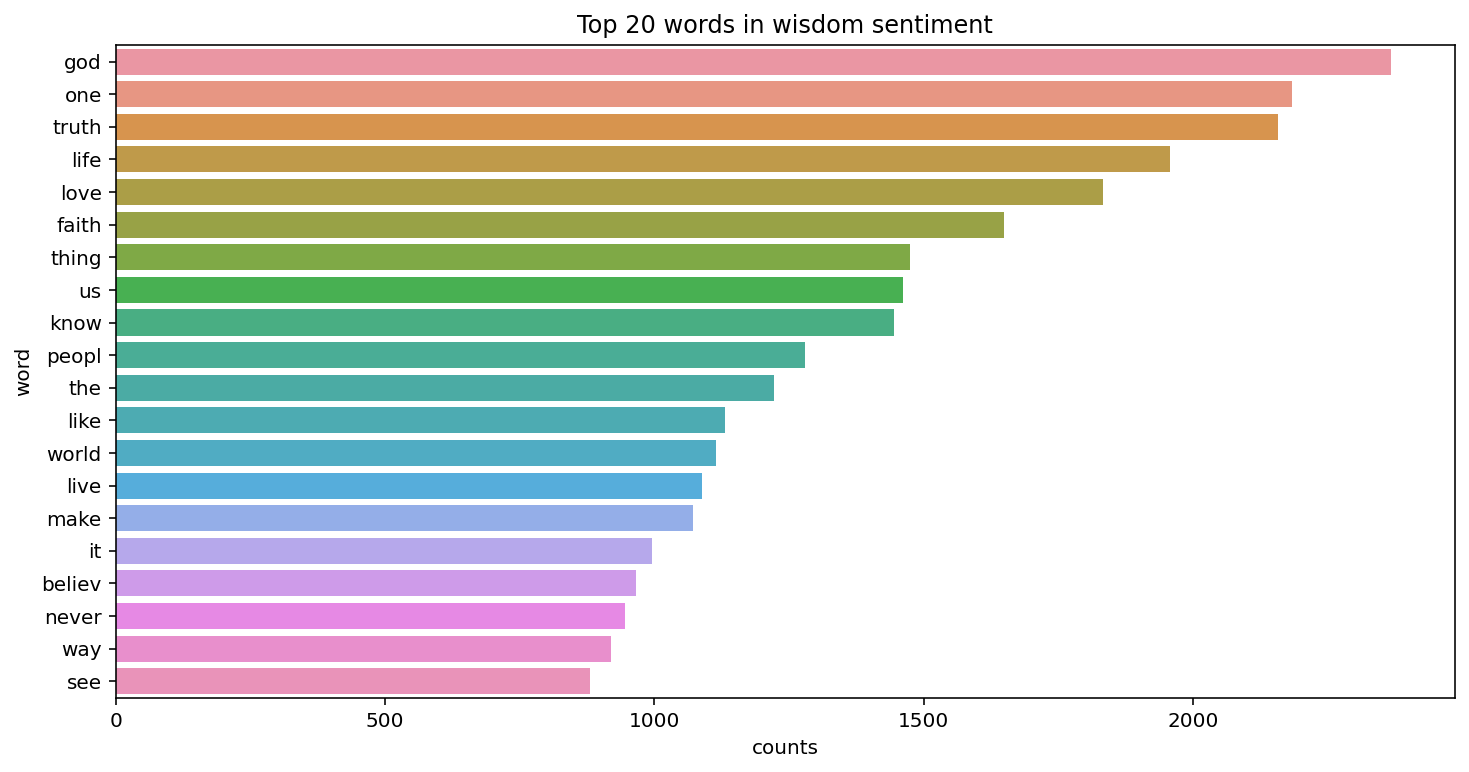

In [82]:
plot_freq(wisdom_words, 'wisdom')

## Distribution of top n-grams

In [83]:
def get_top_n_gram(corpus, c,  n_gram, top_n=None):
    
    # list of splited senteces, which is just list of words
    text = [word for sent in corpus[corpus['class'] == c]['clean_text'] for word in sent.split()]

    grams = ngrams(text, n_gram)
    grams = (' '.join(g) for g in grams)
    num_of_grams = [words for words in grams]
    freq_words = Counter(num_of_grams)
    freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
    freq_words_df = pd.DataFrame(freq_words_sorted[:top_n], columns=['word', 'counts'])
    return freq_words_df[:top_n]

### Two-grams for love quotes

In [84]:
love_2_gram = get_top_n_gram(data, 'love', 2, 20)
love_2_gram.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,love love,fall love,let go,dont know,love someon,i love,feel like,look like,love one,love you,dont want,i want,love like,one day,someon els,make love,know love,everi day,true love,one thing
counts,228,191,149,130,125,120,116,103,97,94,90,89,88,79,74,74,74,73,73,71


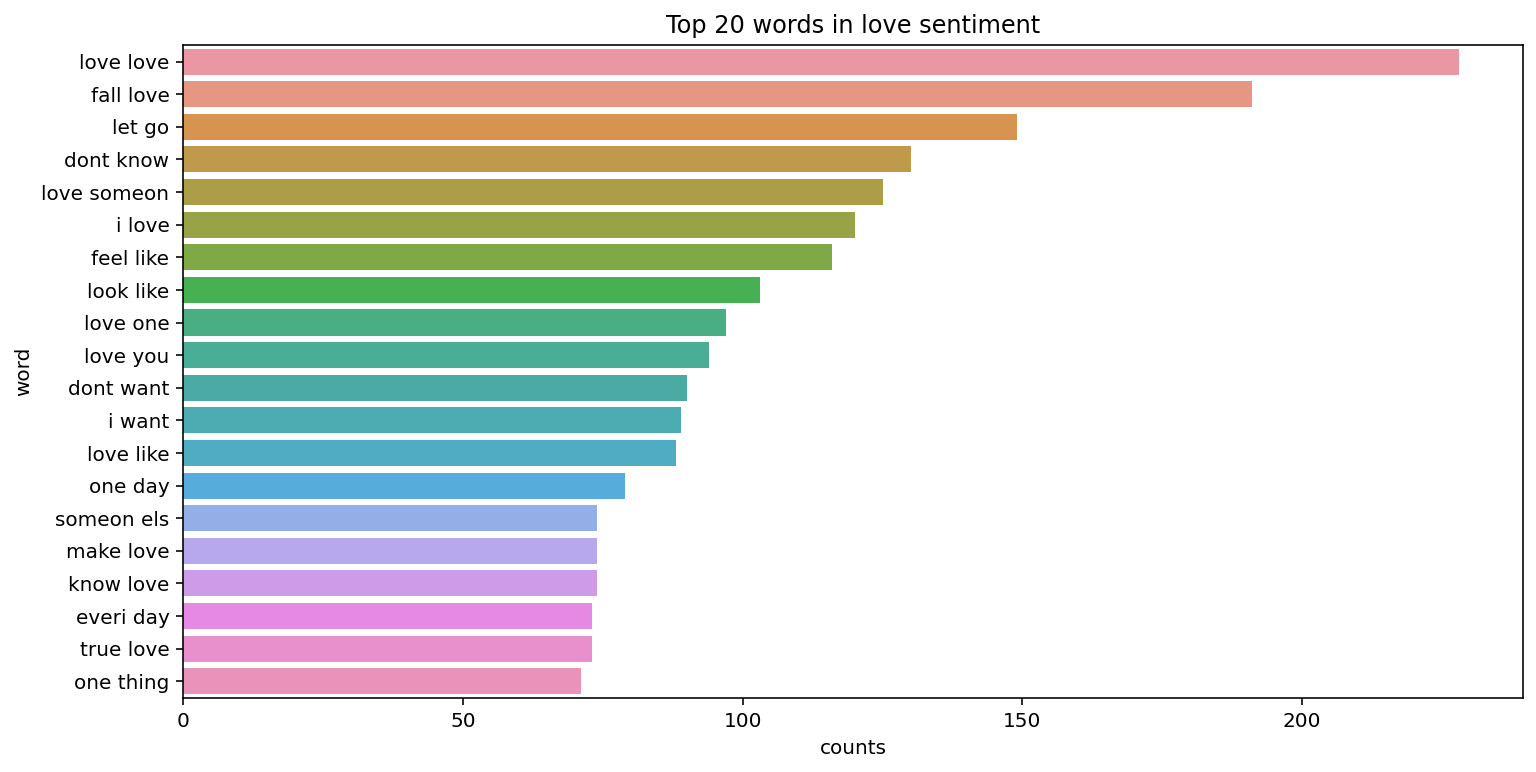

In [85]:
plot_freq(love_2_gram, 'love')

### Two-grams for motivation quotes

In [86]:
motivation_2_gram = get_top_n_gram(data, 'motivation', 2, 20)
motivation_2_gram.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,let go,live life,one day,everi day,dont know,someon els,thing happen,feel like,one thing,i want,love love,dont want,there noth,even though,mani peopl,i dont,never know,good thing,move forward,new day
counts,123,97,95,90,79,72,62,61,57,52,52,49,49,47,47,47,46,46,46,46


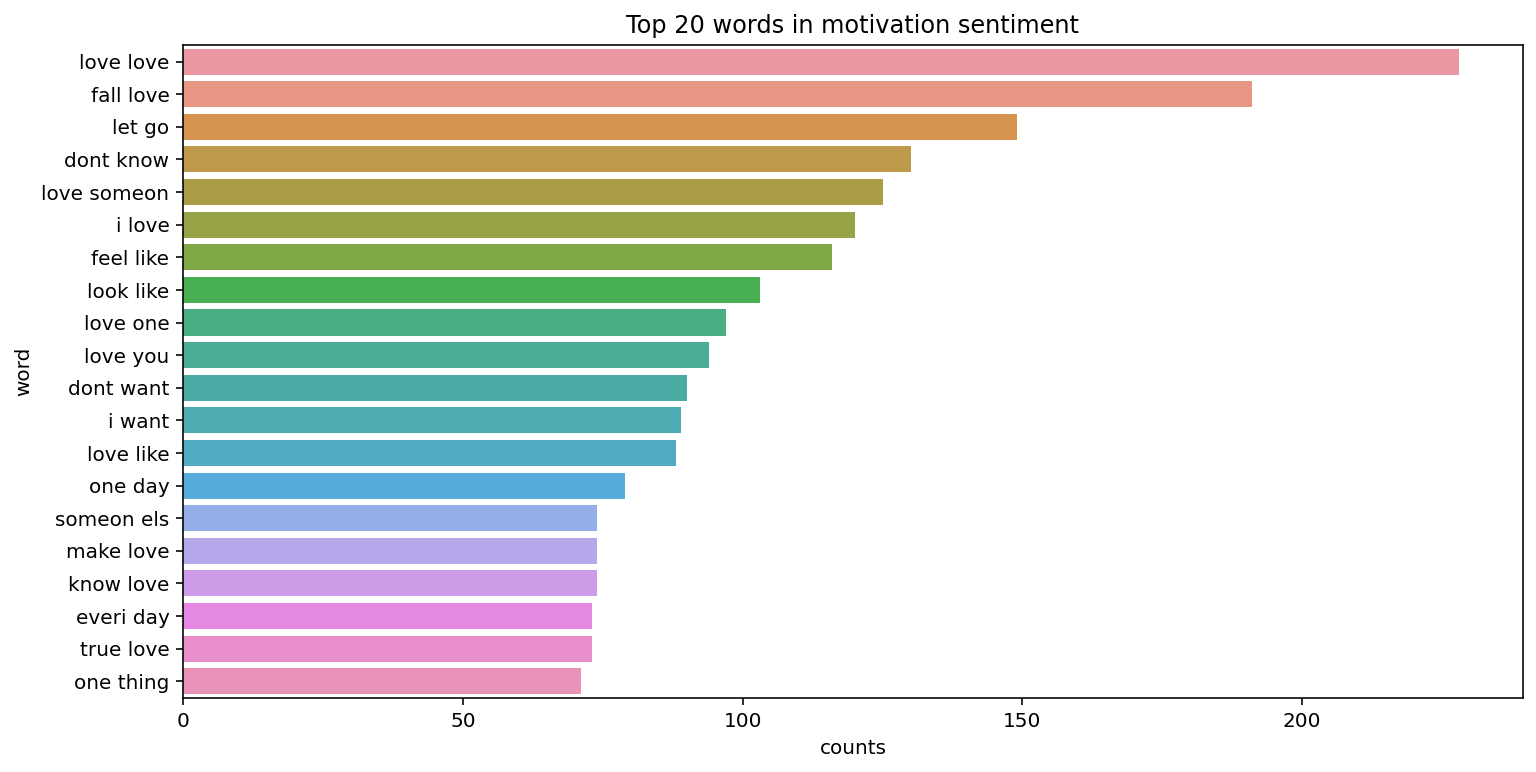

In [87]:
plot_freq(love_2_gram, 'motivation')

### Two-grams for wisdom quotes

In [88]:
wisdom_2_gram = get_top_n_gram(data, 'wisdom', 2, 20)
wisdom_2_gram.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,the truth,one thing,tell truth,let go,believ god,dont know,human be,love one,give us,someon els,mani peopl,make us,live life,one day,one anoth,love love,truth truth,tell us,love god,god god
counts,102,87,84,81,70,65,64,56,55,55,54,54,53,52,51,50,48,47,46,44


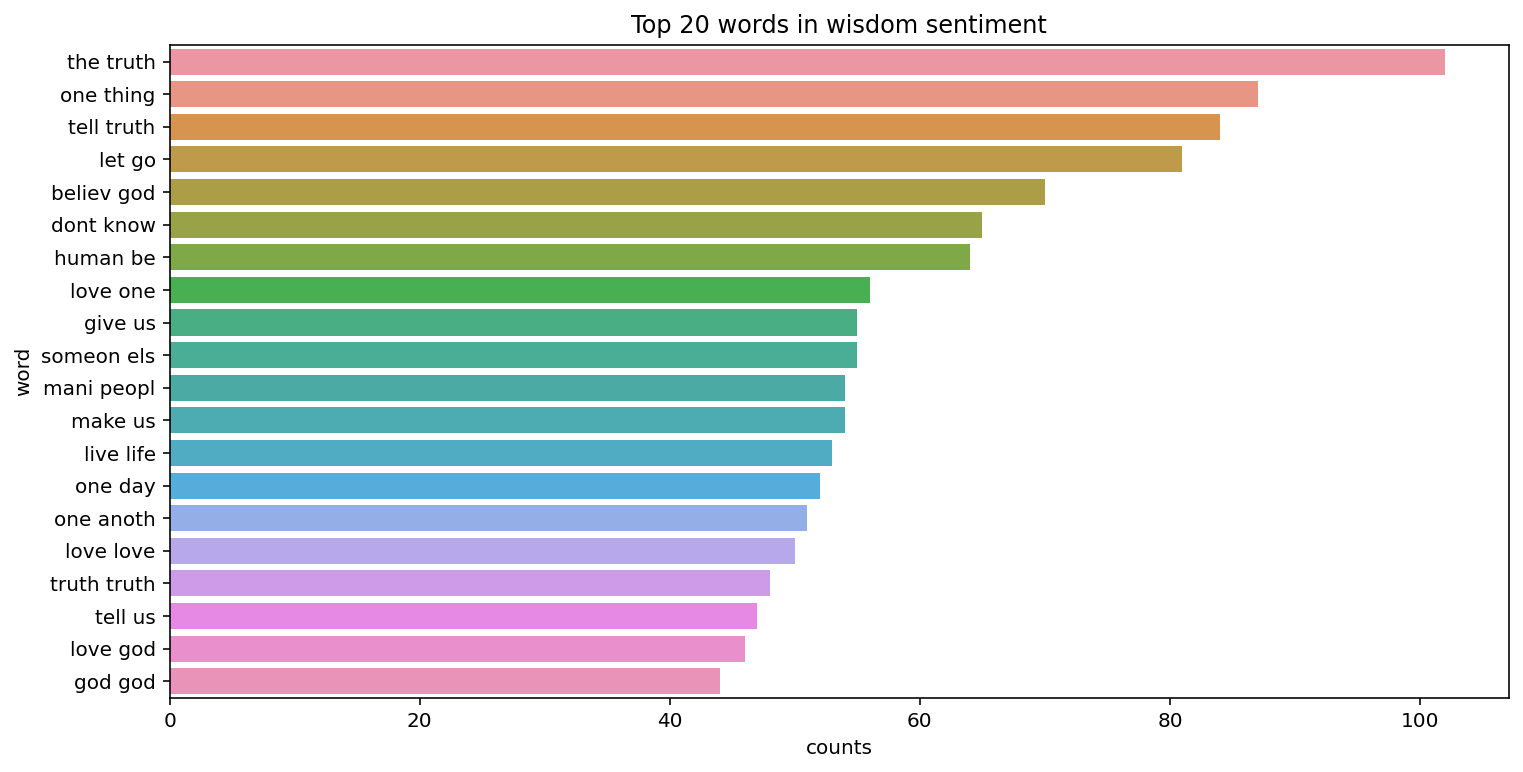

In [89]:
plot_freq(wisdom_2_gram, 'wisdom')

**We can easily make tri-grams for sentiment using this function `get_top_n_gram` by passing `n_gram = 3`**

## Word Cloud

In [90]:
# getting list of love quotes
love_text_clean = data[data['class' ] == 'love']['clean_text']
love_clean_words = [word for words in love_text_clean for word in words.split()]

In [91]:
# getting list of motivation quotes
motivation_text_clean = data[data['class' ] == 'motivation']['clean_text']
motivation_clean_words = [word for words in motivation_text_clean for word in words.split()]


In [92]:
# getting list of wisdom quotes
wisdom_text_clean = data[data['class' ] == 'wisdom']['clean_text']
wisdom_clean_words = [word for words in wisdom_text_clean for word in words.split()]


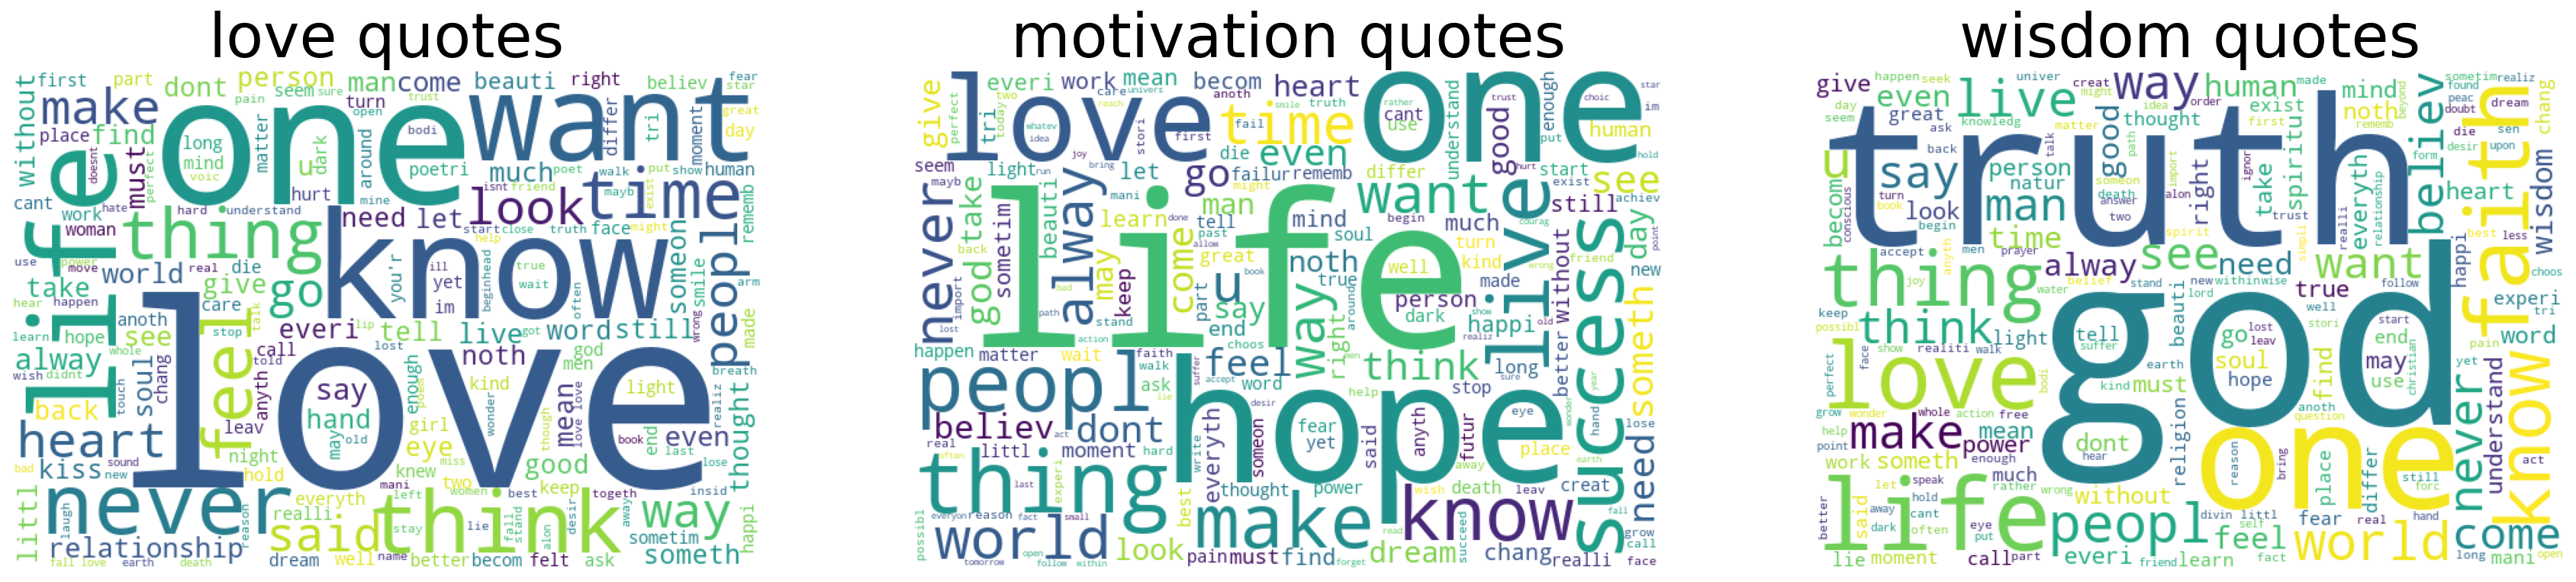

In [93]:
from wordcloud import WordCloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(love_clean_words))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('love quotes',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(motivation_clean_words))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('motivation quotes',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(wisdom_clean_words))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('wisdom quotes',fontsize=40);

# Modeling

In [98]:

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
np.random.seed(2021) # for reproducibility , to get the same results when evry your run



import math
import string
import re
from datetime import datetime

from sklearn.utils import shuffle

import sys
import os
import glob


from sklearn.model_selection import train_test_split

from transformers import TFRobertaModel, RobertaConfig, RobertaTokenizerFast
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential




import torch
import torchvision
from transformers import AutoTokenizer, AutoConfig

import tensorflow as tf

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

%config InlineBackend.figure_format = 'retina'
stop_words = stopwords.words('english')

2021-09-13 21:10:14.145130: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
data.head()

,quotes,class,clean_text,label,text_n_chars,text_n_words
0,“Some people would fall in or out of love with...,love,some peopl would fall love lose gain kilos,0,42,8
1,“It is literally true that you can succeed bes...,motivation,it liter true succeed best quickest help other...,1,54,9
2,“Wisdom most of the time takes form of advice....,wisdom,wisdom time take form advic,2,28,5
3,“Whoever is full of wisdom is naturally compas...,wisdom,whoever full wisdom natur compassion fact reco...,2,207,29
4,“It took the city of New York to break them up...,love,it took citi new york break that romant word m...,0,75,14


### Splitting the data

In [96]:
# Split into train and test
X_train, X_val, y_train, y_val = train_test_split(data.clean_text.values, data.label, test_size=0.1, random_state=2020)

In [97]:
len(X_train), len(X_val), len(y_train), len(y_val)

(32391, 3599, 32391, 3599)

#### Build the model  

In [99]:

# Name of the Roberta model to use
model_name = 'roberta-base'

# Load transformers config and set output_hidden_states to False
config = RobertaConfig.from_pretrained(model_name)
config.output_hidden_states = False

# Load Roberta tokenizer
tokenizer = RobertaTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

# Load the Transformers BERT model
transformer_model = TFRobertaModel.from_pretrained(model_name, config = config)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

2021-09-13 21:10:55.357588: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-13 21:10:55.361400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-13 21:10:55.413594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-13 21:10:55.414758: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-13 21:10:55.414880: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-13 21:10:55.453568: I tensorflow/stream_executor/platform/def

In [100]:
all_quotes = data.clean_text.values
encoded_tweets_ = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_quotes]

Token indices sequence length is longer than the specified maximum sequence length for this model (613 > 512). Running this sequence through the model will result in indexing errors


In [101]:
# This is work well
all_quotes = data.clean_text.values

# Encode our concatenated data
encoded_quotes = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_quotes]

# Find the maximum length
max_length_all_quotes_training = max([len(sent) for sent in encoded_quotes])

print('Max length in traning: ', max_length_all_quotes_training)

# we choosen 38 because is the max lenght in evaluation
max_length_all_quotes_training = 38
print('Max length in traning: ', max_length_all_quotes_training)

# Load the MainLayer
roberta = transformer_model.layers[0]

# Build your model input
input_ids = Input(shape=(max_length_all_quotes_training,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(max_length_all_quotes_training,), name='attention_mask', dtype='int32') 

inputs = {'input_ids': input_ids}

# Load the Transformers Roberta model as a layer in a Keras model
roberta_model = roberta(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(roberta_model, training=False)

# Then build your model output
labels = Dense(units=len(set(y_train)), activation='softmax', kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='issue')(pooled_output)
# outputs = Dense(3, activation='softmax')(labels)
outputs = {'label': labels}

# And combine it all in a model object

model = Model(inputs=inputs, outputs=outputs, name='Roberta_MultiLabel_MultiClass')

# Take a look at the model
model.summary()

Max length in traning:  7322
Max length in traning:  38
Model: "Roberta_MultiLabel_MultiClass"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 38)]              0         
_________________________________________________________________
roberta (TFRobertaMainLayer) TFBaseModelOutputWithPool 124645632 
_________________________________________________________________
pooled_output (Dropout)      (None, 768)               0         
_________________________________________________________________
issue (Dense)                (None, 3)                 2307      
Total params: 124,647,939
Trainable params: 124,647,939
Non-trainable params: 0
_________________________________________________________________


#### Train the model

In [102]:
# define hyperparameters
# batch_size_no = 8
# epochs_no = 20

valid_split = 0.2
batch_size_no = 32
epochs_no = 5
initial_lr = 5e-05
step_no = math.ceil(len(data)/32)

In [103]:
# Set an optimizer
optimizer = Adam(
    learning_rate=initial_lr,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = {'label': CategoricalCrossentropy(from_logits = True)}
# loss = {'label': CategoricalCrossentropy(from_logits = False)} # when i using it = False, get low accuracy!!
metric = {'label': CategoricalAccuracy('accuracy')}

# Compile the model
model.compile(optimizer = optimizer, loss = loss, metrics = metric)

# Ready output data for the model
y_labels = to_categorical(data.label)

# Tokenize the input (takes some time)
x = tokenizer(
    text=data.quotes.tolist(),
    add_special_tokens=True,
    max_length=max_length_all_quotes_training,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)


checkpoint_filepath = 'roberta_keras_weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [104]:
%%time
# Fit the model
history = model.fit(
    x={'input_ids': x['input_ids']},
    y={'label': y_labels},
    validation_split=valid_split,
    batch_size=batch_size_no,
    epochs=epochs_no,
    callbacks=[model_checkpoint_callback]
    )


2021-09-13 21:11:59.478700: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-13 21:11:59.491489: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/8
900/900 [==============================] - 219s 216ms/step - loss: 0.8006 - accuracy: 0.6364 - val_loss: 0.6841 - val_accuracy: 0.7109
Epoch 2/8
900/900 [==============================] - 190s 211ms/step - loss: 0.6338 - accuracy: 0.7399 - val_loss: 0.6844 - val_accuracy: 0.7156
Epoch 3/8
900/900 [==============================] - 190s 211ms/step - loss: 0.5999 - accuracy: 0.7561 - val_loss: 0.6896 - val_accuracy: 0.7149
Epoch 4/8
900/900 [==============================] - 191s 212ms/step - loss: 0.5723 - accuracy: 0.7722 - val_loss: 0.6920 - val_accuracy: 0.7170
Epoch 5/8
900/900 [==============================] - 192s 213ms/step - loss: 0.5620 - accuracy: 0.7745 - val_loss: 0.6978 - val_accuracy: 0.7156
Epoch 6/8
900/900 [==============================] - 191s 212ms/step - loss: 0.5403 - accuracy: 0.7834 - val_loss: 0.7048 - val_accuracy: 0.7151
Epoch 7/8
900/900 [==============================] - 190s 211ms/step - loss: 0.5354 - accuracy: 0.7869 - val_loss: 0.7035 - val_ac

##### Save model weights

In [105]:
model.save(checkpoint_filepath)
# files.download(checkpoint_filepath)

##### Load and compile model weights 

In [106]:
# load model weights
checkpoint_filepath = 'roberta_keras_weights.h5'
model.load_weights(checkpoint_filepath)

# Set an optimizer
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = {'label': CategoricalCrossentropy(from_logits = True)}
metric = {'label': CategoricalAccuracy('accuracy')}

# Compile the model
model.compile(optimizer = optimizer, loss = loss, metrics = metric)

# Evaluate the model 

In [107]:
test_y_labels = to_categorical(list(y_val))
test_y_labels.shape

(3599, 3)

In [108]:
# Encode our concatenated data
encoded_test_quotes = [tokenizer.encode(sent, add_special_tokens=True) for sent in X_val]
max_length_text_tweet_eval = max([len(sent) for sent in encoded_test_quotes]) 

max_length_text_quotes_eval = 38

# Ready test data
test_y_labels = to_categorical(list(y_val))

test_x = tokenizer(
    text=list(X_val),
    add_special_tokens=True,
    max_length = max_length_text_quotes_eval,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)


# Run evaluation
model_eval = model.evaluate(
    x={'input_ids': test_x['input_ids']},
    y={'label': test_y_labels}
)


113/113 [==============================] - 13s 79ms/step - loss: 0.8695 - accuracy: 0.6227


##### Model Predictions

In [109]:
input_pred = tokenizer(
    text=list(X_val),
    add_special_tokens=True,
    max_length=max_length_text_quotes_eval,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)

print("input_pred['input_ids'].shape:",input_pred['input_ids'].shape)

y_pred = model.predict(input_pred['input_ids'])

input_pred['input_ids'].shape: (3599, 38)


In [110]:
print(y_pred['label'].shape)
y_pred = np.array([np.argmax(item) for item in y_pred['label']])
print(len(y_pred))

(3599, 3)
3599


In [111]:
y_val = np.array([int(item) for item in y_val])
print(y_val[:10])
y_val.shape

[2 0 1 0 0 2 1 2 2 1]


(3599,)

In [112]:
print(y_pred[:10])
y_pred.shape

[0 2 2 0 0 2 2 2 2 1]


(3599,)

In [113]:
from sklearn.metrics import classification_report

target_names = data['class'].unique().tolist()
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        love       0.65      0.77      0.71      1234
  motivation       0.72      0.43      0.53      1173
      wisdom       0.58      0.70      0.63      1192

    accuracy                           0.64      3599
   macro avg       0.65      0.63      0.63      3599
weighted avg       0.65      0.64      0.63      3599



## Make a predict sentiment of sentence.

In [114]:
data.head()

,quotes,class,clean_text,label,text_n_chars,text_n_words
0,“Some people would fall in or out of love with...,love,some peopl would fall love lose gain kilos,0,42,8
1,“It is literally true that you can succeed bes...,motivation,it liter true succeed best quickest help other...,1,54,9
2,“Wisdom most of the time takes form of advice....,wisdom,wisdom time take form advic,2,28,5
3,“Whoever is full of wisdom is naturally compas...,wisdom,whoever full wisdom natur compassion fact reco...,2,207,29
4,“It took the city of New York to break them up...,love,it took citi new york break that romant word m...,0,75,14


In [115]:
sentiment_dict = {'love':0,
                  'motivation': 1,
                  'wisdom' : 2
                 }

In [116]:
list(sentiment_dict.keys()), list(sentiment_dict.values())

(['love', 'motivation', 'wisdom'], [0, 1, 2])

In [117]:
class_name = list(sentiment_dict.keys())
class_name

['love', 'motivation', 'wisdom']

In [118]:
tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(list(X_train) + list(X_val))

In [119]:
def get_sentiment(text):
    text = clean_text(text)
    twt = tokenizer.texts_to_sequences([text])
    twt = pad_sequences(twt, maxlen=max_length_text_quotes_eval, padding='post' , dtype='int32')
    sentiment = model.predict(twt,batch_size=1)['label'][0].tolist()
    print('Sentiment:\t', list(sentiment_dict.keys()))
    print('List of scores: ', sentiment)
    max_idx = np.argmax(sentiment)
    print('Index of max value:', max_idx)   #     print('Index of max value:', class_name[max_idx])  
    sentiment_key = list(sentiment_dict.keys())[list(sentiment_dict.values()).index(max_idx)]
    return sentiment_key

In [120]:
def printing(data, quote, index= -1):
    if index != -1:
        quote = data['clean_text'][index]
    print(f"Text:\n{quote}")  
    print('='*70)
    if index != -1:
        print(f'Actual sentiment is  : {data["class"][index]}')
        print('*'*70)
    print('The predicted sentiment is:', get_sentiment(quote))
    print('*'*70)
    

In [127]:
printing(data, '', index= 4444)

Text:
if give want think want youll end miserable
Actual sentiment is  : wisdom
**********************************************************************
Sentiment:	 ['love', 'motivation', 'wisdom']
List of scores:  [0.31917905807495117, 0.44468820095062256, 0.23613275587558746]
Index of max value: 1
The predicted sentiment is: motivation
**********************************************************************


In [143]:
printing(data, '', index= 50)

Text:
with prayer man may find hidden power progress
Actual sentiment is  : wisdom
**********************************************************************
Sentiment:	 ['love', 'motivation', 'wisdom']
List of scores:  [0.2835279405117035, 0.3806012272834778, 0.3358708918094635]
Index of max value: 1
The predicted sentiment is: motivation
**********************************************************************


In [126]:
printing(data, "life is too short to give a shit!")

Text:
life is too short to give a shit!
Sentiment:	 ['love', 'motivation', 'wisdom']
List of scores:  [0.2987145185470581, 0.3900851011276245, 0.3112003207206726]
Index of max value: 1
The predicted sentiment is: motivation
**********************************************************************


In [144]:
printing(data, "All you need is love")

Text:
All you need is love
Sentiment:	 ['love', 'motivation', 'wisdom']
List of scores:  [0.42341822385787964, 0.35480281710624695, 0.22177891433238983]
Index of max value: 0
The predicted sentiment is: love
**********************************************************************


In [130]:
printing(data, "Count your age by friends, not years. Count your life by smiles, not tears") 

Text:
Count your age by friends, not years. Count your life by smiles, not tears
Sentiment:	 ['love', 'motivation', 'wisdom']
List of scores:  [0.6114317774772644, 0.10211049765348434, 0.28645768761634827]
Index of max value: 0
The predicted sentiment is: love
**********************************************************************
